In [40]:
# import the dataset
import pandas as pd
results_df = pd.read_csv('NYPD_Arrests_Data__Historic_.csv')  

### Data Cleaning

In [41]:
results_df.head

<bound method NDFrame.head of          ARREST_KEY ARREST_DATE  PD_CD                             PD_DESC  \
0          32311380  06/18/2007  511.0  CONTROLLED SUBSTANCE, POSSESSION 7   
1         192799737  01/26/2019  177.0                        SEXUAL ABUSE   
2         193260691  02/06/2019    NaN                                 NaN   
3         149117452  01/06/2016  153.0                              RAPE 3   
4         190049060  11/15/2018  157.0                              RAPE 1   
...             ...         ...    ...                                 ...   
5153364   207601040  01/08/2020  273.0                TAMPERING 1,CRIMINAL   
5153365   206891807  01/01/2020  113.0               MENACING,UNCLASSIFIED   
5153366   207760542  01/11/2020  339.0      LARCENY,PETIT FROM OPEN AREAS,   
5153367   206896678  01/01/2020  105.0                   STRANGULATION 1ST   
5153368   206908101  01/02/2020  782.0            WEAPONS, POSSESSION, ETC   

         KY_CD                   

In [42]:
results_df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [43]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153369 entries, 0 to 5153368
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 747.0+ MB


In [44]:
import matplotlib.pyplot as plt

results_df = results_df.rename(columns={'AGE_GROUP': 'age_group', 'PERP_SEX': 'perp_sex','PERP_RACE':'perp_race','ARREST_BORO':'arrest_boro','LAW_CAT_CD':'law_cat_cd'})
results_df.age_group = results_df.age_group.astype('category')
results_df.perp_sex  = results_df.perp_sex.astype('category')
results_df.perp_race = results_df.perp_race.astype('category')
results_df.arrest_boro = results_df.arrest_boro.astype('category')
results_df.law_cat_cd = results_df.law_cat_cd.astype('category')
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153369 entries, 0 to 5153368
Data columns (total 19 columns):
 #   Column             Dtype   
---  ------             -----   
 0   ARREST_KEY         int64   
 1   ARREST_DATE        object  
 2   PD_CD              float64 
 3   PD_DESC            object  
 4   KY_CD              float64 
 5   OFNS_DESC          object  
 6   LAW_CODE           object  
 7   law_cat_cd         category
 8   arrest_boro        category
 9   ARREST_PRECINCT    int64   
 10  JURISDICTION_CODE  float64 
 11  age_group          category
 12  perp_sex           category
 13  perp_race          category
 14  X_COORD_CD         float64 
 15  Y_COORD_CD         float64 
 16  Latitude           float64 
 17  Longitude          float64 
 18  Lon_Lat            object  
dtypes: category(5), float64(7), int64(2), object(5)
memory usage: 575.0+ MB


In [45]:
print(results_df.perp_sex.values)
print(type(results_df.perp_sex.values))

['M', 'M', 'M', 'M', 'M', ..., 'M', 'M', 'M', 'M', 'M']
Length: 5153369
Categories (2, object): ['F', 'M']
<class 'pandas.core.arrays.categorical.Categorical'>


In [46]:
results_df['perp_sex'].value_counts()

M    4288497
F     864872
Name: perp_sex, dtype: int64

### Graphs

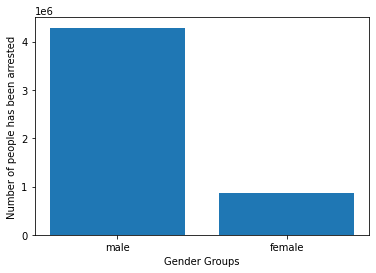

In [47]:
names = ['male', 'female']
values = [4288497,864872]
plt.bar(names, values)
plt.xlabel("Gender Groups")
plt.ylabel("Number of people has been arrested")
plt.show()

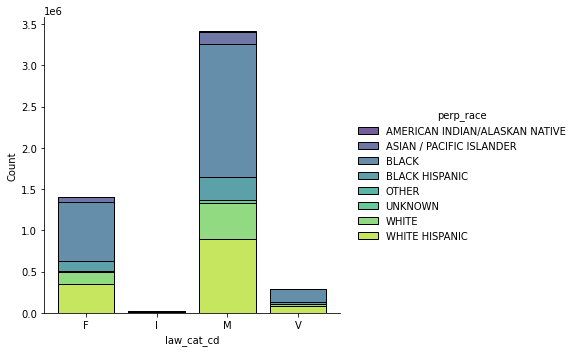

In [48]:
import seaborn as sns

sns.displot(data = results_df, x = 'law_cat_cd', hue= 'perp_race', multiple="stack", palette ='viridis', shrink=.8)

<AxesSubplot:xlabel='arrest_boro', ylabel='Count'>

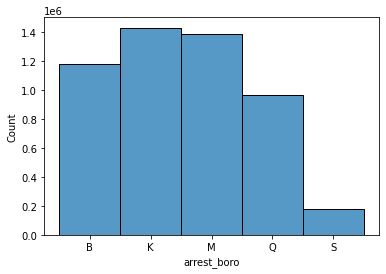

In [49]:
sns.histplot(data = results_df, x = 'arrest_boro', multiple="stack", palette ='viridis', shrink=1.0)

In [50]:
results_df['perp_race'].value_counts()

BLACK                             2502715
WHITE HISPANIC                    1338275
WHITE                              620640
BLACK HISPANIC                     415263
ASIAN / PACIFIC ISLANDER           212687
UNKNOWN                             51000
AMERICAN INDIAN/ALASKAN NATIVE      11426
OTHER                                1363
Name: perp_race, dtype: int64

Text(0, 0.5, 'Number of people has been arrested')

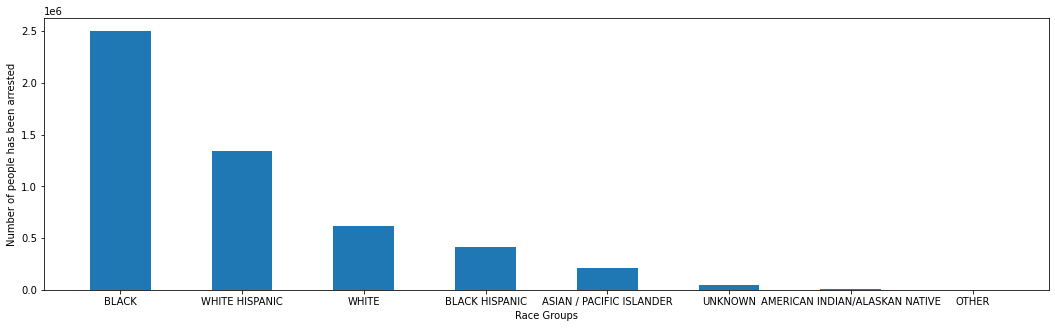

In [51]:
f, ax = plt.subplots(figsize=(18,5))
names = results_df['perp_race'].value_counts().index.values
values = results_df['perp_race'].value_counts().values
plt.bar(names, values, width = 0.5)
plt.xlabel("Race Groups")
plt.ylabel("Number of people has been arrested")

In [52]:
results_df['age_group'].value_counts()

25-44    2393751
18-24    1346183
45-64     951323
<18       418131
65+        43786
          ...   
708            1
1937           1
640            1
194            1
1018           1
Name: age_group, Length: 91, dtype: int64

Text(0, 0.5, 'Number of people has been arrested')

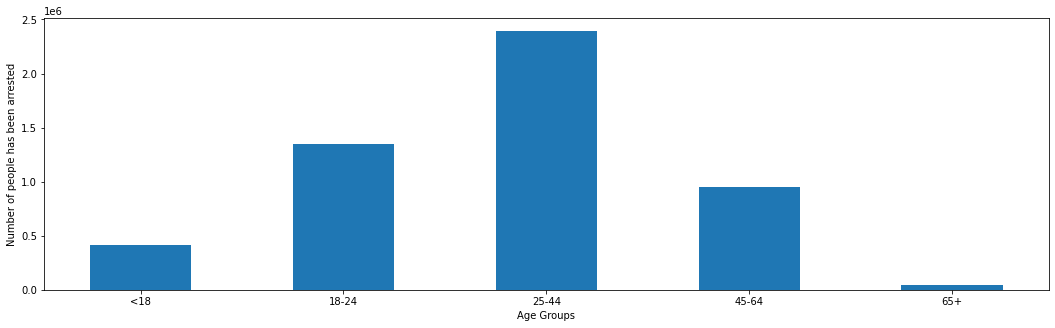

In [53]:
f, ax = plt.subplots(figsize=(18,5))
names = ['<18','18-24','25-44','45-64','65+']
values = [418131,1346183,2393751,951323,43786]
plt.bar(names, values, width = 0.5)
plt.xlabel("Age Groups")
plt.ylabel("Number of people has been arrested")

In [54]:
results_df['arrest_boro'].value_counts()

K    1431460
M    1390956
B    1178906
Q     970451
S     181588
Name: arrest_boro, dtype: int64

Text(0, 0.5, 'Number of people has been arrested')

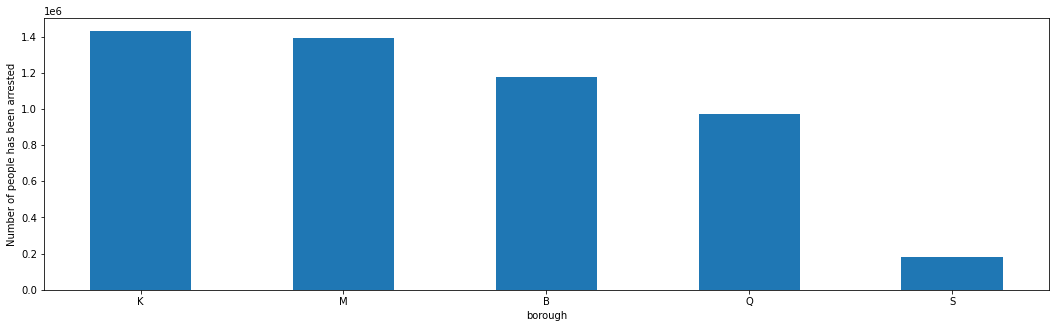

In [55]:
f, ax = plt.subplots(figsize=(18,5))
names = results_df['arrest_boro'].value_counts().index.values
values = results_df['arrest_boro'].value_counts().values
plt.bar(names, values, width = 0.5)
plt.xlabel("borough")
plt.ylabel("Number of people has been arrested")

In [56]:
results_df['law_cat_cd'].value_counts()

M    3411013
F    1404172
V     293065
I      26258
Name: law_cat_cd, dtype: int64

In [57]:
results_df[['perp_race', 'law_cat_cd']].value_counts()

perp_race                       law_cat_cd
BLACK                           M             1610274
WHITE HISPANIC                  M              899687
BLACK                           F              719939
WHITE                           M              432940
WHITE HISPANIC                  F              344872
BLACK HISPANIC                  M              277094
BLACK                           V              154806
WHITE                           F              150691
ASIAN / PACIFIC ISLANDER        M              145552
BLACK HISPANIC                  F              116882
WHITE HISPANIC                  V               80523
ASIAN / PACIFIC ISLANDER        F               57757
UNKNOWN                         M               36242
WHITE                           V               29949
BLACK HISPANIC                  V               17667
UNKNOWN                         F               11217
BLACK                           I               10265
AMERICAN INDIAN/ALASKAN NATIVE  M      

In [58]:
results_df[['perp_race', 'law_cat_cd']].value_counts().index.values

array([('BLACK', 'M'), ('WHITE HISPANIC', 'M'), ('BLACK', 'F'),
       ('WHITE', 'M'), ('WHITE HISPANIC', 'F'), ('BLACK HISPANIC', 'M'),
       ('BLACK', 'V'), ('WHITE', 'F'), ('ASIAN / PACIFIC ISLANDER', 'M'),
       ('BLACK HISPANIC', 'F'), ('WHITE HISPANIC', 'V'),
       ('ASIAN / PACIFIC ISLANDER', 'F'), ('UNKNOWN', 'M'),
       ('WHITE', 'V'), ('BLACK HISPANIC', 'V'), ('UNKNOWN', 'F'),
       ('BLACK', 'I'), ('AMERICAN INDIAN/ALASKAN NATIVE', 'M'),
       ('WHITE HISPANIC', 'I'), ('ASIAN / PACIFIC ISLANDER', 'V'),
       ('WHITE', 'I'), ('UNKNOWN', 'V'),
       ('AMERICAN INDIAN/ALASKAN NATIVE', 'F'),
       ('ASIAN / PACIFIC ISLANDER', 'I'), ('BLACK HISPANIC', 'I'),
       ('OTHER', 'M'), ('AMERICAN INDIAN/ALASKAN NATIVE', 'V'),
       ('UNKNOWN', 'I'), ('OTHER', 'F'),
       ('AMERICAN INDIAN/ALASKAN NATIVE', 'I'), ('OTHER', 'V'),
       ('OTHER', 'I')], dtype=object)

In [59]:
results_df[['perp_race', 'law_cat_cd']].value_counts().values

array([1610274,  899687,  719939,  432940,  344872,  277094,  154806,
        150691,  145552,  116882,   80523,   57757,   36242,   29949,
         17667,   11217,   10265,    8269,    8033,    6614,    3968,
          2889,    2475,    1933,    1481,     955,     552,     467,
           339,     107,      65,       4])

In [60]:
items = results_df[['perp_race', 'law_cat_cd']].value_counts().index.values
tupletostring = []
for item in items:
    new_item = item[0] + '-'+ item[1]
    tupletostring.append(new_item)

<BarContainer object of 32 artists>

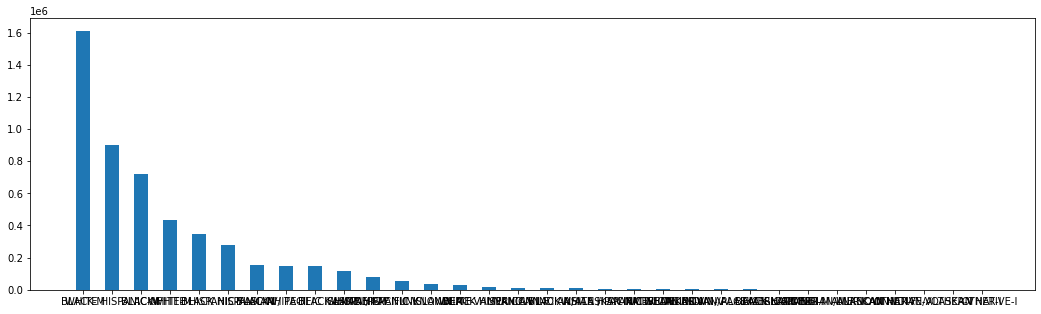

In [61]:
f, ax = plt.subplots(figsize=(18,5))
names = tupletostring
values = results_df[['perp_race', 'law_cat_cd']].value_counts().values
plt.bar(names, values, width = 0.5)

In [62]:
Black = []
White = []
M = []
F = []
I = []
V = []
Black_num = []
White_num = []
M_num = []
F_num = []
I_num = []
V_num = []
items = results_df[['perp_race', 'law_cat_cd']].value_counts().index.values
values = results_df[['perp_race', 'law_cat_cd']].value_counts().values
for i in range(len(items)):
    if items[i][0] == 'BLACK':
        new_item = items[i][0] + '-'+ items[i][1]
        Black.append(new_item)
        Black_num.append(values[i])
    elif items[i][0] == 'WHITE':
        new_item = items[i][0] + '-'+ items[i][1]
        White.append(new_item)
        White_num.append(values[i])
    if items[i][1] == 'M':
        new_item = items[i][0] + '-'+ items[i][1]
        M.append(new_item)
        M_num.append(values[i])
    elif items[i][1] == 'F':
        new_item = items[i][0] + '-'+ items[i][1]
        F.append(new_item)
        F_num.append(values[i])
    elif items[i][1] == 'I':
        new_item = items[i][0] + '-'+ items[i][1]
        I.append(new_item)
        I_num.append(values[i])
    elif items[i][1] == 'V':
        new_item = items[i][0] + '-'+ items[i][1]
        V.append(new_item)
        V_num.append(values[i])    

In [63]:
#Black_num

In [64]:
# items = results_df[['perp_race', 'law_cat_cd']].value_counts().index.values
# len(items)
# items[0]

Text(0, 0.5, 'Number of people has been arrested')

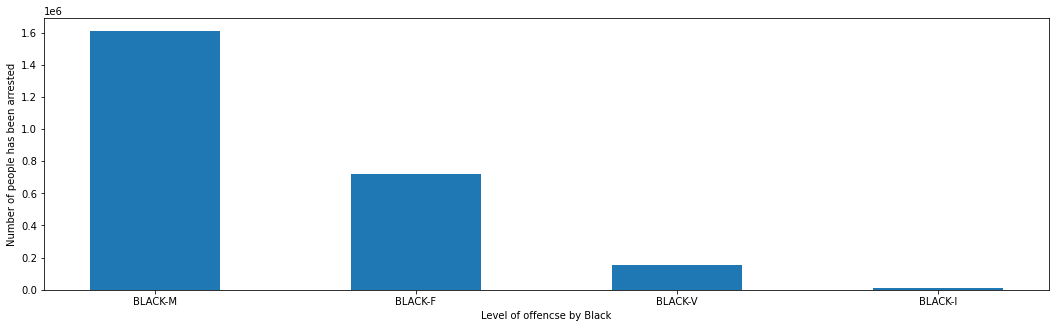

In [65]:
f, ax = plt.subplots(figsize=(18,5))
names = Black
values = Black_num
plt.bar(names, values, width = 0.5)
plt.xlabel("Level of offencse by Black")
plt.ylabel("Number of people has been arrested")

Text(0, 0.5, 'Number of people has been arrested')

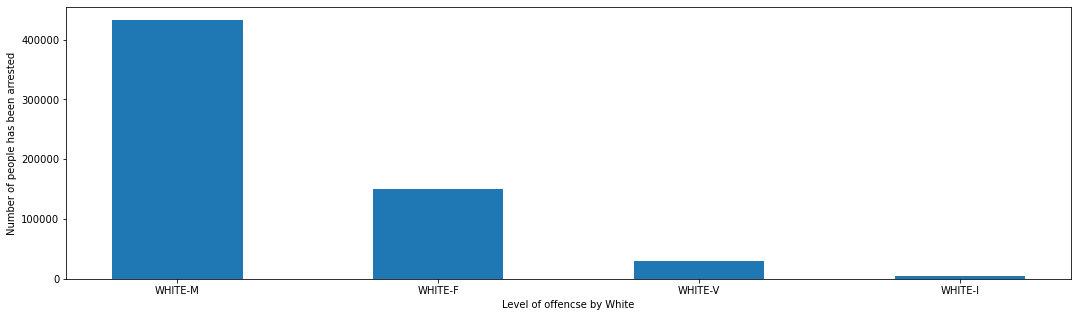

In [66]:
f, ax = plt.subplots(figsize=(18,5))
names = White
values = White_num
plt.bar(names, values, width = 0.5)
plt.xlabel("Level of offencse by White")
plt.ylabel("Number of people has been arrested")

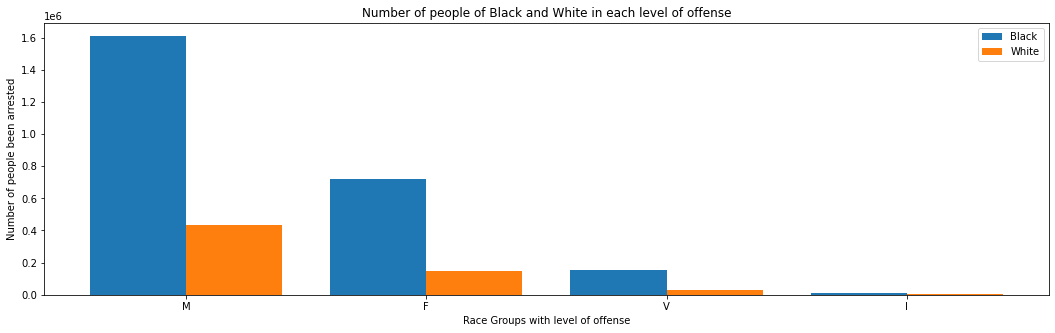

In [67]:
import numpy as np
f, ax = plt.subplots(figsize=(18,5))
names =['M','F','V','I']
X_axis = np.arange(len(names))
plt.bar(X_axis - 0.2, Black_num, 0.4, label = 'Black')
plt.bar(X_axis + 0.2, White_num, 0.4, label = 'White')

plt.xticks(X_axis, names)
plt.xlabel("Race Groups with level of offense")
plt.ylabel("Number of people been arrested")
plt.title("Number of people of Black and White in each level of offense")
plt.legend()
plt.show()

Text(0, 0.5, 'Number of people has been arrested')

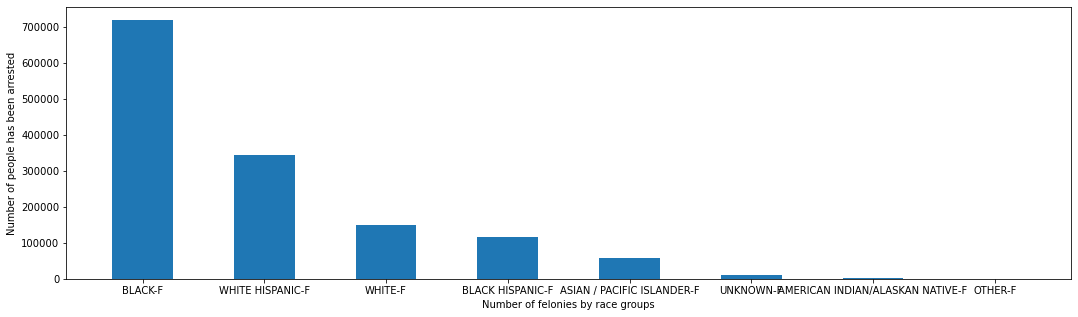

In [68]:
f, ax = plt.subplots(figsize=(18,5))
names = F
values = F_num
plt.bar(names, values, width = 0.5)
plt.xlabel("Number of felonies by race groups")
plt.ylabel("Number of people has been arrested")

Text(0, 0.5, 'Number of people has been arrested')

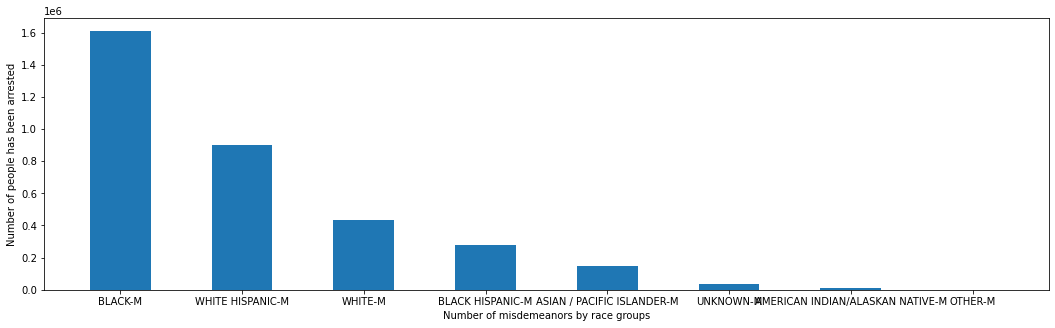

In [69]:
f, ax = plt.subplots(figsize=(18,5))
names = M
values = M_num
plt.bar(names, values, width = 0.5)
plt.xlabel("Number of misdemeanors by race groups")
plt.ylabel("Number of people has been arrested")

Text(0, 0.5, 'Number of people has been arrested')

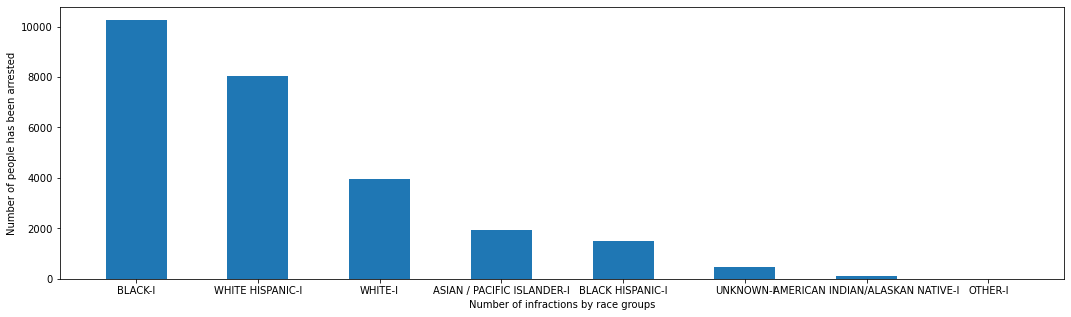

In [70]:
f, ax = plt.subplots(figsize=(18,5))
names = I
values = I_num
plt.bar(names, values, width = 0.5)
plt.xlabel("Number of infractions by race groups")
plt.ylabel("Number of people has been arrested")

Text(0, 0.5, 'Number of people has been arrested')

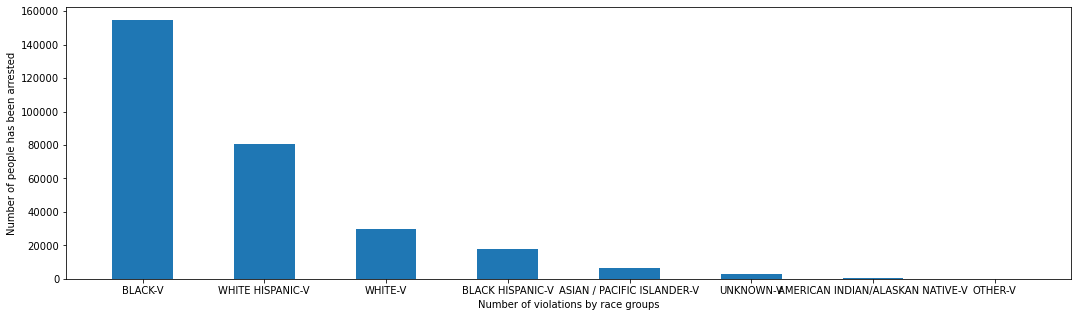

In [71]:
f, ax = plt.subplots(figsize=(18,5))
names = V
values = V_num
plt.bar(names, values, width = 0.5)
plt.xlabel("Number of violations by race groups")
plt.ylabel("Number of people has been arrested")